# Week8 - Homework KNN-NB-SVM

- Use GridSearchCV on X_train dataset
    - KNN, NB, SVM, Logistic Regression, Decision Trees
- Test on X_test dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
X_train = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/X_train.csv')
y_train = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/y_train.csv')

In [3]:
X_test = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/X_final.csv')
y_test = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/y_final.csv')

In [4]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (40000, 1)
y_train: (40000, 1)
X_test: (10000, 1)
y_test: (10000, 1)


In [5]:
X_train.head()

,review
0,"Shame, is a Swedish film in Swedish with Engli..."
1,I know it's rather unfair to comment on a movi...
2,"""Bread"" very sharply skewers the conventions o..."
3,After reading tons of good reviews about this ...
4,During the Civil war a wounded union soldier h...


In [6]:
y_train.head()

,sentiment
0,1
1,0
2,1
3,1
4,1


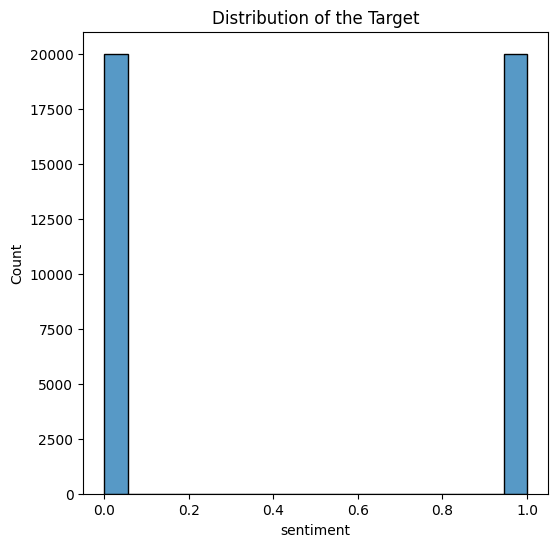

In [7]:
plt.figure(figsize= (6,6))
sns.histplot(data= y_train, x= 'sentiment')
plt.title('Distribution of the Target')
plt.show()

In [8]:
X_train_subset = X_train[:8000]

In [15]:
y_train_subset = y_train[:8000]

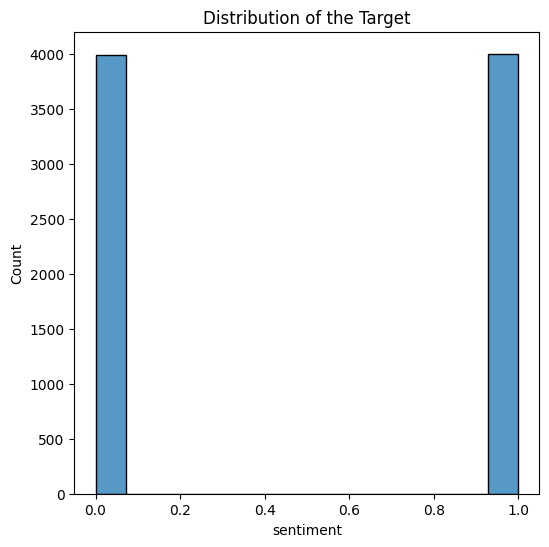

In [16]:
plt.figure(figsize= (6,6))
sns.histplot(data= y_train_subset, x= 'sentiment')
plt.title('Distribution of the Target')
plt.show()

In [18]:
X_train_subset_train, X_train_subset_test, y_train_subset_train, y_train_subset_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=100)

In [19]:
X_train_subset_train

,review
2784,"""The Danish Bladerunner"" is boldly stated on t..."
4121,My 15 year old daughter asked me to watch this...
6302,I used to always love the bill because of its ...
2948,I was aware of Man of the Year's critical pans...
5630,Someone once defined what is the definition of...
...,...
79,"After reading some of these reviews, it is app..."
3927,My spouse & I found this movie to be very schl...
5955,I felt this film did have many good qualities....
6936,"Deanna Durbin, then 14 and just under contract..."


In [20]:
X_train_subset_test

,review
7512,This movie was nominated for best picture but ...
434,This is the first movie i've seen of John Sing...
4933,"Before I had seen this film, I had heard some ..."
1264,At last!! Sandra Bullock is indeed a beautiful...
59,I saw Two Hands back in Sydney a few years ago...
...,...
536,"To sum this movie up, it is LaBute carrying hi..."
6824,"I saw this film via one of the actors' agents,..."
5826,I truly despair for womankind when they discus...
6918,Crossing the Bridge: the Sound of Istanbul rec...


In [21]:
y_train_subset_train

,sentiment
2784,0
4121,0
6302,0
2948,0
5630,1
...,...
79,1
3927,0
5955,1
6936,1


In [22]:
y_train_subset_test

,sentiment
7512,1
434,1
4933,0
1264,1
59,1
...,...
536,0
6824,1
5826,0
6918,1


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def model_pipe(model, vectorizer, scale=False):
    from sklearn.pipeline import Pipeline

    mp = Pipeline([('vectorizer', vectorizer), ('model', model)])
    return mp

vectorizer = CountVectorizer(max_features=10000, stop_words='english')

### KNN

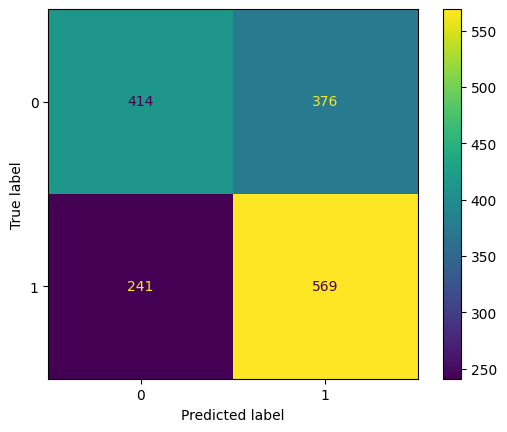

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10],
               'model__n_neighbors': [1, 4, 8, 10, 15],
               'model__weights': ['uniform','distance']}
 ]

mp = model_pipe(KNeighborsClassifier(), vectorizer)

bag_knn_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_knn_results = bag_knn_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())

ConfusionMatrixDisplay.from_estimator(bag_knn_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [36]:
bag_knn_results.best_params_

{'model__n_neighbors': 15,
 'model__weights': 'distance',
 'vectorizer__min_df': 0.05,
 'vectorizer__ngram_range': (1, 2)}

In [38]:
print("K-Nearest Neighbors - Training:", bag_knn_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel()))

K-Nearest Neighbors - Training: 1.0


In [39]:
print("K-Nearest Neighbors - Testing:", bag_knn_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel()))

K-Nearest Neighbors - Testing: 0.614375


### Navie Bayes

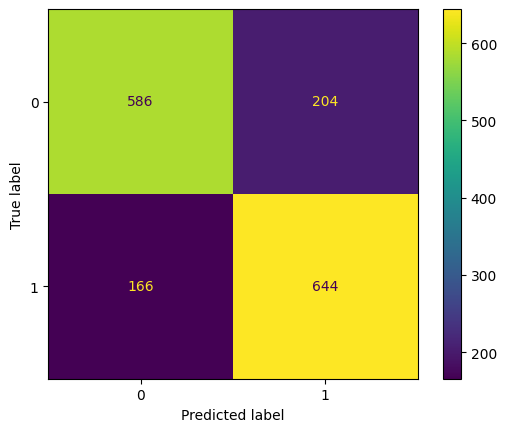

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10]}
 ]

mp = model_pipe(BernoulliNB(), vectorizer)

bag_nb_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_nb_results = bag_nb_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())

ConfusionMatrixDisplay.from_estimator(bag_nb_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [40]:
bag_nb_results.best_params_

{'vectorizer__min_df': 0.05, 'vectorizer__ngram_range': (1, 1)}

In [41]:
print("Naive Bayes - Training:", bag_nb_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel()))

Naive Bayes - Training: 0.785625


In [42]:
print("Naive Bayes - Testing:", bag_nb_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel()))

Naive Bayes - Testing: 0.76875


### SVM

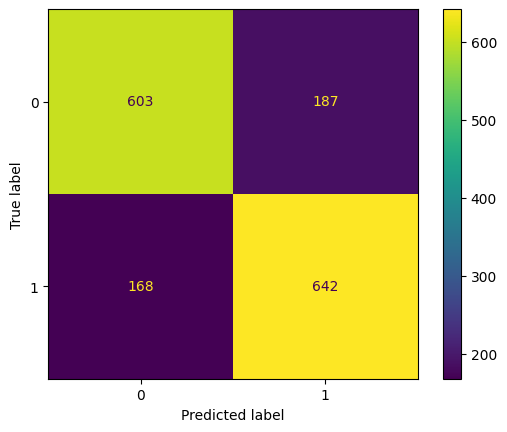

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10],
               'model__C': [0.1, 1, 10],
               'model__kernel': ['linear', 'rbf'],
               'model__class_weight': [None, 'balanced']}
 ]

mp = model_pipe(SVC(), vectorizer)

bag_svm_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_svm_results = bag_svm_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())

ConfusionMatrixDisplay.from_estimator(bag_svm_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [43]:
bag_svm_results.best_params_

{'model__C': 1,
 'model__class_weight': 'balanced',
 'model__kernel': 'linear',
 'vectorizer__min_df': 0.05,
 'vectorizer__ngram_range': (1, 1)}

In [48]:
print("Support Vector Machine - Training:", bag_svm_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel()))

Support Vector Machine - Training: 0.82984375


In [49]:
print("Support vector Machine - Testing:", bag_svm_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel()))

Support vector Machine - Testing: 0.778125


### Logistic Regression

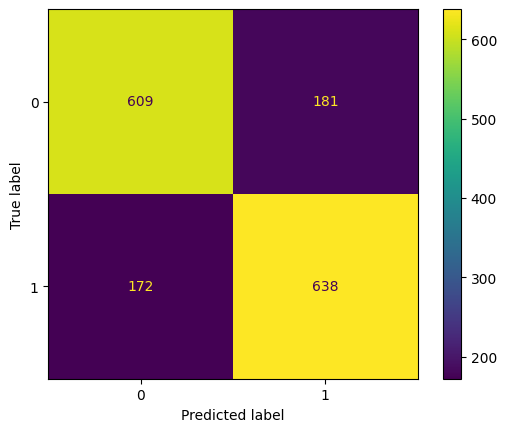

In [31]:
param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10],
               'model__C': [0.1, 1, 10],
               'model__class_weight': [None, 'balanced']}
 ]

mp = model_pipe(LogisticRegression(solver='liblinear'), vectorizer)

bag_lr_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_lr_results = bag_lr_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())

ConfusionMatrixDisplay.from_estimator(bag_lr_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [50]:
bag_lr_results.best_params_

{'model__C': 0.1,
 'model__class_weight': 'balanced',
 'vectorizer__min_df': 0.05,
 'vectorizer__ngram_range': (1, 1)}

In [51]:
print("Logistic Regression - Training:", bag_lr_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel()))

Logistic Regression - Training: 0.83078125


In [52]:
print("Logistic Regression - Testing:", bag_lr_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel()))

Logistic Regression - Testing: 0.779375


### Decision Tree

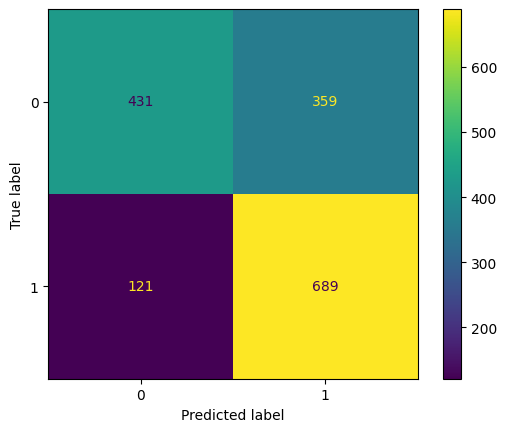

In [35]:
param_grid = [{
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__min_df': [0.05, 0.10],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__class_weight': [None, 'balanced']
}]


mp = model_pipe(DecisionTreeClassifier(), vectorizer)

bag_dt_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_dt_results = bag_dt_results.fit(X_train_subset_train['review'], y_train_subset_train.values.ravel())

ConfusionMatrixDisplay.from_estimator(bag_dt_results, X_train_subset_test['review'], y_train_subset_test.values.ravel())
plt.show()

In [53]:
bag_dt_results.best_params_

{'model__class_weight': None,
 'model__max_depth': 10,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 10,
 'vectorizer__min_df': 0.05,
 'vectorizer__ngram_range': (1, 2)}

In [54]:
print("Decision Tree - Training:", bag_dt_results.score(X_train_subset_train['review'], y_train_subset_train.values.ravel()))

Decision Tree - Training: 0.75203125


In [55]:
print("Decision Tree - Testing:", bag_dt_results.score(X_train_subset_test['review'], y_train_subset_test.values.ravel()))

Decision Tree - Testing: 0.7


Based on the accuracy for the above models, Logistic Regression performs well as it gives 78% of accuracy, So I am training the whole dataset by using the best parameters on this model.

### Best Model-Logistic Regression

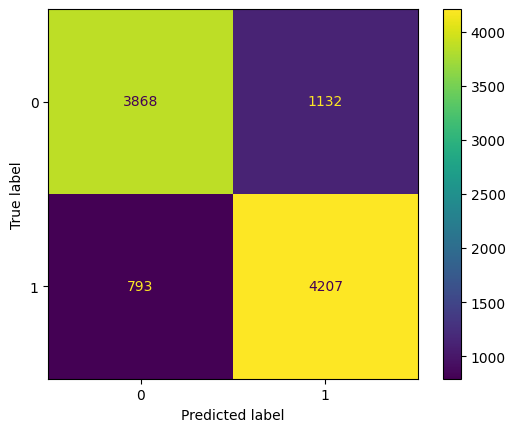

In [58]:
best_model_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=10000, stop_words='english',min_df=0.05, ngram_range=(1, 1))),
    ('model', LogisticRegression(solver='liblinear', C=0.1, class_weight='balanced'))
])

m = best_model_pipeline.fit(X_train['review'], y_train.values.ravel())

ConfusionMatrixDisplay.from_estimator(m, X_test['review'], y_test.values.ravel())
plt.show()

In [60]:
print("Logistic Regression - training - best model - accuracy:", m.score(X_train['review'], y_train.values.ravel()))

Logistic Regression - training - best model - accuracy: 0.8146


In [63]:
print("Logistic Regression - testing - best model - accuracy:", m.score(X_test['review'], y_test.values.ravel()))

Logistic Regression - testing - best model - accuracy: 0.8075


In [64]:
from sklearn.metrics import classification_report

y_pred = best_model_pipeline.predict(X_test['review'])
print(classification_report(y_test.values.ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      5000
           1       0.79      0.84      0.81      5000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



The accuracy for the Logistic Regression model for the whole dataset using best parameters is 81%.